<a href="https://colab.research.google.com/github/munawarali93/NASA-Near-Earth-Objects/blob/main/NASA_near_earth_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mentor:
Kashif bari

##Team members:
1. Munawar Ali
2. Cagatay Ayhan
3. Ece KARACAM
4. Mostofa Hisham
5. Waleed Ahmed

Near-Earth Objects (NEOs) are comets and asteroids that have been nudged by the gravitational attraction of nearby planets into orbits that allow them to enter the Earth’s neighborhood. As they orbit the Sun, Near-Earth Objects occasionally approach close to Earth. We plan to develop several models for detecting whether or not a NEO is hazardous. We will likely use the data provided here: https://www.kaggle.com/datasets/sameepvani nasa-nearest-earth-objects/data
Sources: https://api.nasa.gov
https://cneos.jpl.nasa.gov/ca/

In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [5]:
data = pd.read_csv("neo.csv")
print(data.shape)
print(data.info())
data['average_diameter'] = (data['est_diameter_max'] + data['est_diameter_min'])/2
data = data.drop(columns = ['orbiting_body','sentry_object', 'id', 'name']).copy()
data['hazardous'] = data['hazardous'].replace({True: 1, False: 0})
data.head()
print(data)

(90836, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB
None
       est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0              1.198271          2.679415       13569.249224   5.483974e+07   
1              0.265800          0.594347       73588.726

In [7]:
y = data['hazardous'].copy()
X = data.drop('hazardous', axis=1).copy()
y.shape

(90836,)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                      shuffle=True,
                                      random_state=614,
                                      test_size=.2)

In [49]:
## Fit then transform the training set
scaler_new = StandardScaler()
scaler_new.fit(X_train)
X_train_scale = scaler_new.transform(X_train)


In [50]:
forest = RandomForestClassifier(n_estimators=50, max_depth=4)
forest.fit(X_train_scale, y_train)

RandomForestClassifier(max_depth=4, n_estimators=50)

In [59]:
RandomForest_preds_test_binary = forest.predict(X_test)
RandomForest_preds_train_binary = forest.predict(X_train_scale)

C:\Users\walee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [60]:
# Compute the accuracy: accuracy for training data with random forrest
y_pred = RandomForest_preds_train_binary 
#y_true = y_train.reshape(-1)
y_true = y_train
accuracy_train = float(np.sum(y_pred==y_true))/y_true.shape[0]
print("accuracy on training for random forrest with full features: %f" % (accuracy_train))

# Compute the accuracy: accuracy
y_pred = RandomForest_preds_test_binary 
#y_true = y_test.reshape(-1)
y_true = y_test
accuracy = float(np.sum(y_pred==y_true))/y_test.shape[0]
print("accuracy on test data for random forrest with full features: %f" % (accuracy))
print("random forrest score:", forest.score(X_test, y_test))

accuracy on training for random forrest with full features: 0.913359
accuracy on test data for random forrest with full features: 0.901035
random forrest score: 0.9010347864376926


C:\Users\walee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [61]:
print(confusion_matrix(y_train, RandomForest_preds_train_binary))
print(classification_report(y_train, RandomForest_preds_train_binary))


[[65453   173]
 [ 6123   919]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     65626
           1       0.84      0.13      0.23      7042

    accuracy                           0.91     72668
   macro avg       0.88      0.56      0.59     72668
weighted avg       0.91      0.91      0.88     72668



In [62]:
print(confusion_matrix(y_test, RandomForest_preds_test_binary))
print(classification_report(y_test, RandomForest_preds_test_binary))

[[16370     0]
 [ 1798     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     16370
           1       0.00      0.00      0.00      1798

    accuracy                           0.90     18168
   macro avg       0.45      0.50      0.47     18168
weighted avg       0.81      0.90      0.85     18168



C:\Users\walee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\walee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\walee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334

In [63]:
print("AUC Train: {:.4f} \nAUC Test: {:.4f}".format(roc_auc_score(y_train, RandomForest_preds_train_binary), roc_auc_score(y_test, RandomForest_preds_test_binary)))

AUC Train: 0.5639 
AUC Test: 0.5000


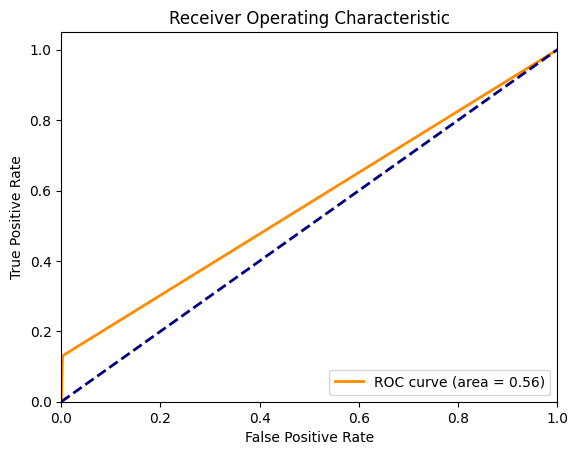

In [64]:
 # ROC AUC curve
fpr, tpr, _ = roc_curve(y_train, RandomForest_preds_train_binary)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()